In [127]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model

In [128]:
df = pd.read_excel("Rainfall_Data.xls")
data = np.zeros((99, 24)) 
FinalData = np.zeros((6, 5)) 

In [129]:
for i in range(99):
    df1 = (((df.where(df['Year']==i+1)).dropna()).drop(['Year','Day'],axis=1)).T
    for j in range(24):
        data[i][j] = max((df1.rolling(j+1).sum()).max())
data1 = pd.DataFrame(data=data[:,[0,1,3,7,11,23]],index=range(1,100),columns=[1,2,4,8,12,24])
data1       

,1,2,4,8,12,24
1,14.87,22.00,32.07,43.87,46.27,46.27
2,12.18,16.04,23.35,33.05,33.52,41.93
3,17.95,24.28,34.98,39.26,54.18,63.40
4,14.42,22.92,29.68,33.81,34.53,46.60
5,20.27,37.49,41.88,46.11,50.88,54.67
...,...,...,...,...,...,...
95,22.08,41.74,53.44,56.14,56.14,56.14
96,16.02,30.37,37.57,55.29,60.80,60.80
97,18.31,24.08,32.82,39.32,44.86,63.19
98,13.72,17.96,27.90,32.39,41.27,42.57


In [130]:
MeanStd = pd.DataFrame([data1.mean(axis = 0),data1.std(ddof = 1,axis = 0)],index = ['Mean', 'Std'])
MeanStd

,1,2,4,8,12,24
Mean,16.694242,27.030505,36.223434,42.877475,47.530606,53.582020
Std,3.963013,7.607383,11.375960,13.553562,15.455382,16.177189


In [131]:
Kt= []
for i in [2,5,10,50,100]:
    Kt.append(-1*math.sqrt(6)/math.pi*(0.5772+math.log(math.log(i/(i-1)))))
Kt = pd.DataFrame(np.transpose(Kt),index=['2','5','10','50','100'],columns=['K_T']).T
Kt

,2,5,10,50,100
K_T,-0.164272,0.719457,1.304563,2.592288,3.136681


In [328]:
for i in range(6):
    for j in range(5):
        FinalData[i][j] =( 
            round(((MeanStd.iloc[0]).iloc[i]+(Kt.iloc[0]).iloc[j]*(MeanStd.iloc[1]).iloc[i])/MeanStd.columns[i],4))
FinalData_df = pd.DataFrame(FinalData,index = ['1', '2','4','8','12','24'],columns = ['2','5','10','50','100'])
FinalData_df.to_excel("FinalData.xlsx") 

In [329]:
RetPer = []
for i in range(6):
    RetPer.append(2)
    RetPer.append(5)
    RetPer.append(10)
    RetPer.append(50)
    RetPer.append(100)    
Dur = []
for i in [1,2,4,8,12,24]:
    for j in range(5):
        Dur.append(i)
Y = np.array(np.log(0.1*FinalData.ravel()))
a = 1.2
X = np.transpose([np.ones(30),np.array(np.log((RetPer))), np.log(np.array(Dur) + a)])
coef = np.dot(np.dot(np.array(np.linalg.inv((np.dot( np.transpose(X),X)))),np.transpose(X)),Y)
k = math.exp(coef[0])
x = (coef[1])
n = -(coef[2])
def f(Dur,ret):
    return (k*(ret**x)/((Dur+a)**n))

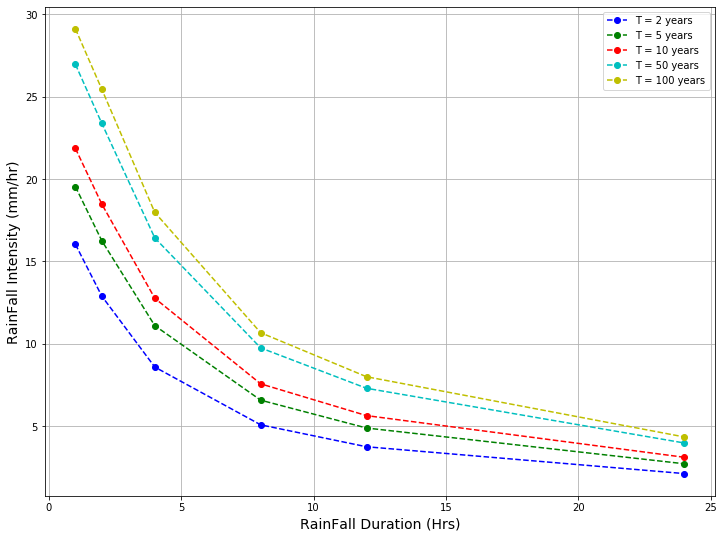

In [330]:
fig = plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
Duration = np.array([1,2,4,8,12,24])
ax.plot(Duration,FinalData[:,0],linestyle='--', marker='o', color='b',label = 'T = 2 years')
ax.plot(Duration,FinalData[:,1],linestyle='--', marker='o', color='g',label = 'T = 5 years')
ax.plot(Duration,FinalData[:,2],linestyle='--', marker='o', color='r',label = 'T = 10 years')
ax.plot(Duration,FinalData[:,3],linestyle='--', marker='o', color='c',label = 'T = 50 years')
ax.plot(Duration,FinalData[:,4],linestyle='--', marker='o', color='y',label = 'T = 100 years')
# plt.plot(np.arange(1,25,1), 10*f(np.arange(1,25,1)), 'o-', 'k')

plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
plt.grid()
plt.savefig('Plot.pdf')  
plt.show()


# USing Empirical Formula

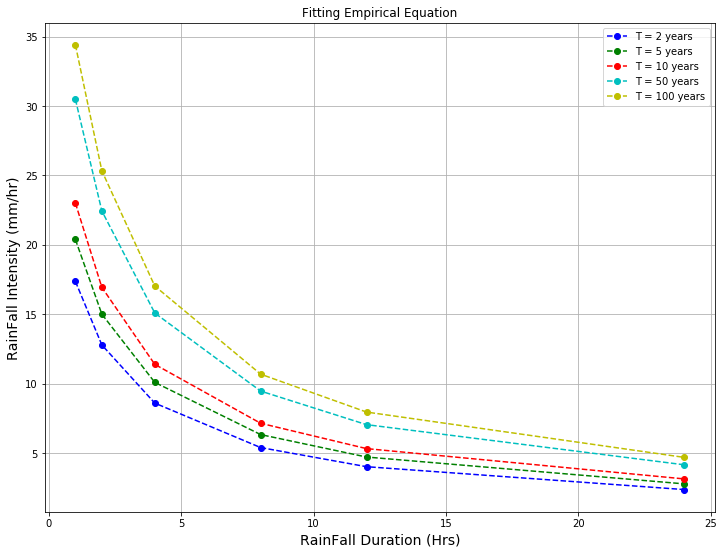

In [319]:
fig = plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
Duration = np.array([1,2,4,8,12,24])
ax.plot(Duration,10*f(Duration,2),linestyle='--', marker='o', color='b',label = 'T = 2 years')
ax.plot(Duration,10*f(Duration,5),linestyle='--', marker='o', color='g',label = 'T = 5 years')
ax.plot(Duration,10*f(Duration,10),linestyle='--', marker='o', color='r',label = 'T = 10 years')
ax.plot(Duration,10*f(Duration,50),linestyle='--', marker='o', color='c',label = 'T = 50 years')
ax.plot(Duration,10*f(Duration,100),linestyle='--', marker='o', color='y',label = 'T = 100 years')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
ax.set_title('Fitting Empirical Equation')
plt.grid()
plt.savefig('Empirical.pdf')  
plt.show()



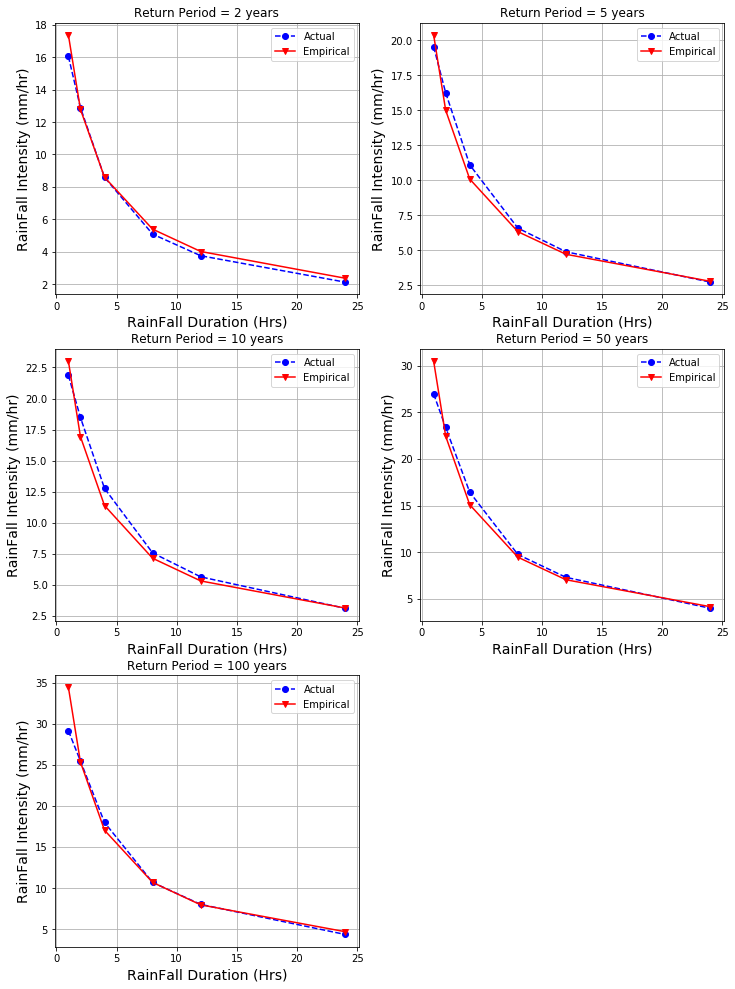

In [331]:
Duration = np.array([1,2,4,8,12,24])
plt.figure(figsize=(12,17))
ax = plt.subplot(3,2,1)
ax.plot(Duration,FinalData[:,0],linestyle='--', marker='o', color='b',label = 'Actual')
ax.plot(Duration,10*f(Duration,2),linestyle='-', marker='v', color='r',label = 'Empirical')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
plt.grid()
ax.set_title("Return Period = 2 years")
ax = plt.subplot(3,2,2)
ax.plot(Duration,FinalData[:,1],linestyle='--', marker='o', color='b',label = 'Actual')
ax.plot(Duration,10*f(Duration,5),linestyle='-', marker='v', color='r',label = 'Empirical')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
plt.grid()
ax.set_title("Return Period = 5 years")
ax = plt.subplot(3,2,3)
ax.plot(Duration,FinalData[:,2],linestyle='--', marker='o', color='b',label = 'Actual')
ax.plot(Duration,10*f(Duration,10),linestyle='-', marker='v', color='r',label = 'Empirical')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
ax.set_title("Return Period = 10 years")
plt.grid()
ax = plt.subplot(3,2,4)
ax.plot(Duration,FinalData[:,3],linestyle='--', marker='o', color='b',label = 'Actual')
ax.plot(Duration,10*f(Duration,50),linestyle='-', marker='v', color='r',label = 'Empirical')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
ax.set_title("Return Period = 50 years")
plt.grid()
ax = plt.subplot(3,2,5)
ax.plot(Duration,FinalData[:,4],linestyle='--', marker='o', color='b',label = 'Actual')
ax.plot(Duration,10*f(Duration,100),linestyle='-', marker='v', color='r',label = 'Empirical')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
ax.set_title("Return Period = 100 years")
plt.grid()
plt.savefig('compare.pdf')